# Домашнее задание №3

In [121]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [122]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

Ответ: строим линейную регрессию

In [123]:
from sklearn.linear_model import LinearRegression
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(Direct_Bilirubin).reshape(-1,1),Total_Bilirubin)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 0.4250270005943011
slope: [1.93375953]


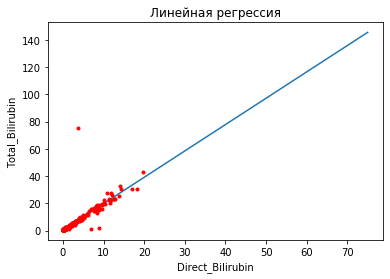

In [127]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(Direct_Bilirubin), max(Total_Bilirubin), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Direct_Bilirubin, Total_Bilirubin, 'r.')
plt.show()

Ответ: делаем предикт. Из таблицы видно, что при Direct_Bilirubin 5,5 есть человек (ix 01 в дата сете) с 10.9 таргетом, а наше значение 11 :) неплохо

In [125]:
model.predict(np.array([5.5]).reshape(-1, 1))

array([11.06070443])

Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

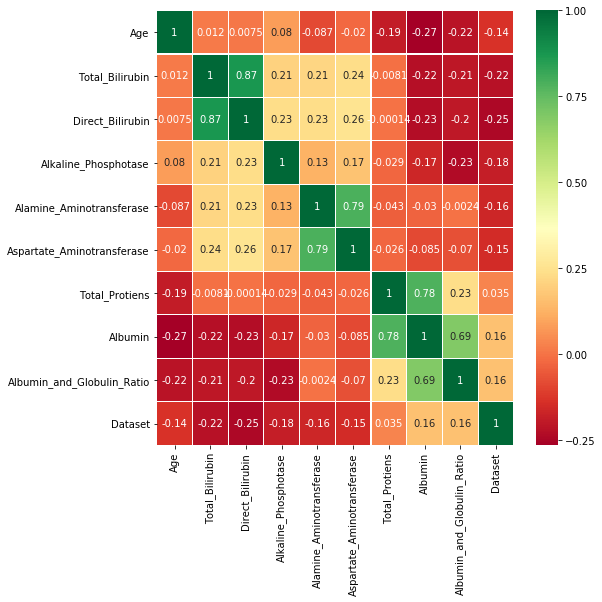

In [17]:
sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()

В качестве параметров возьмем выборки имеющие наибольшую тесноту связи c Dataset. Из heatmap видно, что это Total_BIlirubin и Direct_Bilirubin, но они имеют высокую корреляцию также между собой, поэтому возмем только вторую выборку и 
Alkaline_Phosphotase

In [23]:
Dataset=data['Dataset']
Direct_Bilirubin = data['Direct_Bilirubin']
Alkaline_Phosphotase=data['Alkaline_Phosphotase']

x = np.vstack([np.array(Direct_Bilirubin), np.array(Alkaline_Phosphotase)]).T
print(x[:3])
y = np.array(Dataset)
model = LinearRegression().fit(x, y)

[[1.00e-01 1.87e+02]
 [5.50e+00 6.99e+02]
 [4.10e+00 4.90e+02]]


In [24]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: 1.4105809528676787
slope: [-0.03455122 -0.00025048]


In [44]:
pr_values=[[0.1,187],[5.5,699],[0.4,182]]

In [51]:
print('Предсказание модели: ', model.predict(pr_values))

Предсказание модели:  [1.3602853  1.04546081 1.35117235]


Если округлять значения модели, то все верно, предсказание 1

Посчитать квартили для всех колонок. 

In [19]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

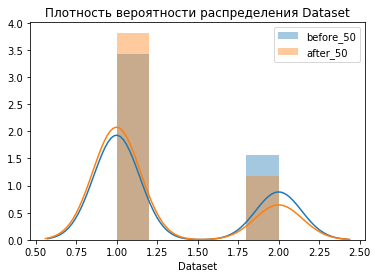

In [74]:
before_50 = data[(data['Age']<=50)]['Dataset']
after_50 = data[(data['Age']>50)]['Dataset']
sns.distplot(before_50, bins=5)
sns.distplot(after_50, bins=5)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['before_50', 'after_50'])
plt.show()

In [77]:
print(before_50.mean(), after_50.mean())

1.3138297872340425 1.2367149758454106


Ответ: Если 2 в Dataset таргете - это болезнь, то вероятность заболеть до 50 совсем немного выше, чем после 50 лет.
По 50 квартилю совсем нет разницы между выборками

In [82]:
print(before_50.quantile([.1, .25, .5, .75]))
print(after_50.quantile([.1, .25, .5, .75]))

0.10    1.0
0.25    1.0
0.50    1.0
0.75    2.0
Name: Dataset, dtype: float64
0.10    1.0
0.25    1.0
0.50    1.0
0.75    1.0
Name: Dataset, dtype: float64



Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [86]:
Ill_Total_Bilirubin=data[(data['Dataset']==2)]['Total_Bilirubin']

In [89]:
stats.ttest_1samp(Ill_Total_Bilirubin, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-27.741265868012515, pvalue=3.1800028045329814e-64)

Ответ: Явно, выборка не похожа на генеральную совокупность, так как pvalue = 0

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [95]:
Ill_Total_Bilirubin=data[(data['Dataset']==2)]['Total_Bilirubin']
Other_Total_Bilirubin=data[(data['Dataset']==1)]['Total_Bilirubin']

stats.ttest_ind(Ill_Total_Bilirubin, Other_Total_Bilirubin)

Ttest_indResult(statistic=-5.441441126834863, pvalue=7.801430929364345e-08)

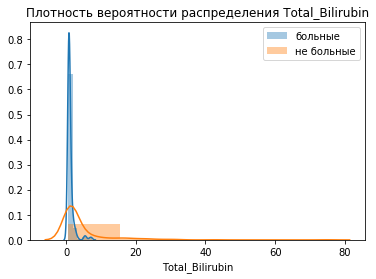

In [104]:
Ill_Total_Bilirubin=data[(data['Dataset']==2)]['Total_Bilirubin']
Other_Total_Bilirubin=data[(data['Dataset']==1)]['Total_Bilirubin']
sns.distplot(Ill_Total_Bilirubin, bins=5)
sns.distplot(Other_Total_Bilirubin, bins=5)
plt.title('Плотность вероятности распределения Total_Bilirubin')
plt.legend(['больные', 'не больные'])
plt.show()

In [ ]:
Ответ: результат аналогичный предыдущему, отвергаем Н0, что они похожи

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [97]:
before_30 = data[(data['Age']<=30)]['Dataset']
after_30 = data[(data['Age']>30)&(data['Age']<=55)]['Dataset']
after_55 = data[(data['Age']>55)]['Dataset']

In [98]:
stats.f_oneway(before_30, after_30, after_55)

F_onewayResult(statistic=8.942833990557906, pvalue=0.0001495741914244918)

Ответ: все три выборки не похожи, об этом говорит pvalue, который меньше 0.05

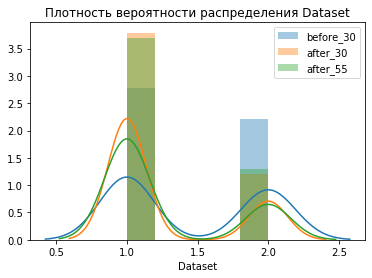

In [101]:
before_30 = data[(data['Age']<=30)]['Dataset']
after_30 = data[(data['Age']>30)&(data['Age']<=55)]['Dataset']
after_55 = data[(data['Age']>55)]['Dataset']
sns.distplot(before_30, bins=5)
sns.distplot(after_30, bins=5)
sns.distplot(after_55, bins=5)
plt.title('Плотность вероятности распределения Dataset')
plt.legend(['before_30', 'after_30','after_55'])
plt.show()